In [1]:
import sys
import os
import json
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
from IPython import display
from sklearn.model_selection import train_test_split

from chemicalchecker import ChemicalChecker 
from chemicalchecker.core import DataSignature
from chemicalchecker.util import Config

ChemicalChecker.set_verbosity('DEBUG')
%matplotlib inline

2022-07-19 10:20:08,428 chemicalchecker.core.chemcheck.ChemicalChecker [DEBUG   ] Logging level DEBUG for logger 'chemicalchecker'.


In [2]:
data_path = "/aloy/web_checker/package_cc/2021_07/sign_links"
local_cc_dir = "/aloy/home/mlocatelli/code/local_cc_complete/"
# Our local cc instance
cc_local = ChemicalChecker(local_cc_dir, custom_data_path=data_path)

2022-07-19 10:20:09,691 chemicalchecker.core.chemcheck.ChemicalChecker [DEBUG   ] ChemicalChecker with root: /aloy/home/mlocatelli/code/local_cc_complete
2022-07-19 10:20:10,050 chemicalchecker.core.chemcheck.ChemicalChecker [INFO    ] CC root directory exists: ignoring 'custom_data_path'.


In [3]:
chembl_antibiotics_df = pd.read_csv('../data/chembl_antobiotics_inchikeys_df.csv')

In [4]:
dataset = 'M1.min_effect_train_test_split'

In [5]:
# Load the raw continuous data (scaled, log-transformed p-values)
# Rows: inchikeys
# Columns: bacterial/yeast strains

inputFile = "../data/maier_spitzer_matrix_log10_transformed_scaled_pvals_filtered_minimal_effect.csv"

df = pd.read_csv(inputFile, index_col = 'InChiKey').drop(['Unnamed: 0'], axis=1)

In [13]:
df.shape

(623, 52)

/opt/miniconda3/envs/py37/lib/python3.7/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


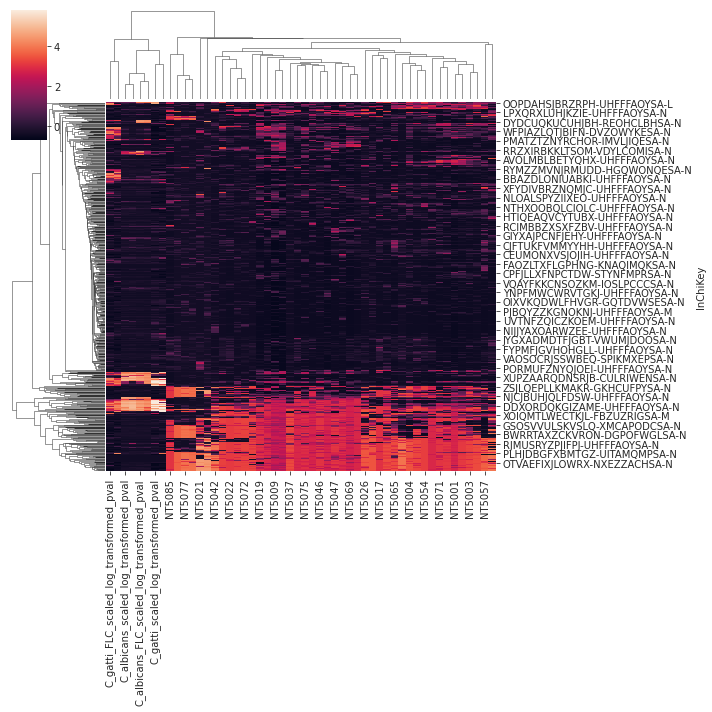

In [7]:
g = sns.clustermap(df)

In [14]:
antibiotic_class_df = pd.read_csv("../data/antibiotic_class_df.csv", index_col="InChiKey")

In [15]:
antibiotic_class_df = antibiotic_class_df[antibiotic_class_df.index.isin(df.index)]

In [16]:
# compute response variable for data split
yeast_effect = df.iloc[:,44:52].mean(axis = 1).to_list()
bac_effect = df.iloc[:,0:44].mean(axis = 1).to_list()

y = []
for i in range(0, df.shape[0]):
    if (yeast_effect[i] > 2) & (bac_effect[i] > 2):
        y.append(2)
    elif bac_effect[i] > 2:
        y.append(1)
    elif yeast_effect[i] > 2:
        y.append(0.5)
    else:
        y.append(0)
        
y_combo = pd.DataFrame(y, antibiotic_class_df['antibiotic_class'].tolist())

# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(df, y_combo, test_size=0.2, random_state=2)

In [17]:
X_train

,C_albicans_FLC_scaled_log_transformed_pval,C_albicans_scaled_log_transformed_pval,C_gatti_FLC_scaled_log_transformed_pval,C_gatti_scaled_log_transformed_pval,C_neoformans_FLC_scaled_log_transformed_pval,C_neoformans_scaled_log_transformed_pval,NT5001,NT5002,NT5003,NT5004,...,NT5076,NT5077,NT5078,NT5079,NT5081,NT5083,NT5084,NT5085,S_cerevisiae_FLC_scaled_log_transformed_pval,S_cerevisiae_scaled_log_transformed_pval
InChiKey,,,,,,,,,,,,,,,,,,,,,
PORMUFZNYQJOEI-UHFFFAOYSA-N,-0.378286,-0.378286,-0.378286,-0.378286,-0.378286,-0.378286,-0.504341,-0.470368,-0.474649,-0.438918,...,-0.341643,-0.364653,-0.308814,-0.354934,-0.413109,-0.370619,-0.256483,-0.398665,-0.378286,-0.378286
NLOALSPYZIIXEO-UHFFFAOYSA-N,-0.281031,-0.322359,0.972195,-0.527292,0.531439,-0.514676,0.163661,-0.116122,-0.380033,-0.158333,...,0.497280,-0.154897,-0.173736,-0.482662,0.127078,0.130305,0.002312,-0.120885,-0.318303,-0.288466
GUGHGUXZJWAIAS-QQYBVWGSSA-N,3.405505,2.842622,-0.304960,-0.603505,-0.382913,-0.353052,0.950051,0.540015,0.522256,1.514740,...,2.751726,-0.364653,-0.305588,2.884521,2.829133,1.903783,-0.374443,3.031825,3.792252,2.392336
CMWTZPSULFXXJA-UHFFFAOYSA-N,0.141769,0.044602,-0.342386,-0.022630,-0.402391,0.181831,-0.443293,-0.470368,-0.474649,-0.438918,...,-0.464412,-0.364653,-0.360703,-0.482662,-0.432021,-0.198117,-0.331021,-0.426903,0.147436,0.527923
NIJJYAXOARWZEE-UHFFFAOYSA-N,-0.378286,-0.378286,-0.378286,-0.378286,-0.378286,-0.378286,-0.504341,-0.470368,-0.474649,-0.438918,...,-0.464412,-0.364653,-0.360703,-0.482662,-0.466030,-0.448750,-0.374443,-0.438189,-0.378286,-0.378286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WMHSRBZIJNQHKT-FFKFEZPRSA-N,-0.378286,-0.378286,-0.378286,-0.378286,-0.378286,-0.378286,-0.504341,-0.470368,-0.474649,-0.396329,...,0.071140,-0.364653,-0.360703,-0.482662,-0.389740,-0.448750,-0.357153,-0.438189,-0.378286,-0.378286
YEEZWCHGZNKEEK-UHFFFAOYSA-N,-0.378286,-0.378286,-0.378286,-0.378286,-0.378286,-0.378286,0.275030,-0.034994,1.481449,0.767236,...,0.160575,-0.364653,-0.360703,-0.467002,0.587401,3.622323,0.221934,0.544888,-0.378286,-0.378286
VGLGVJVUHYTIIU-UHFFFAOYSA-N,-0.354336,-0.228713,-0.418865,-0.198603,-0.497251,-0.428232,-0.116648,-0.470368,0.796382,-0.195134,...,-0.405646,-0.364653,-0.360703,-0.482662,-0.466030,-0.448750,-0.374443,-0.438189,-0.310564,-0.287045


In [16]:
X_train.to_csv("../data/maier_spitzer_fil_log_pvals_scaled_train.csv")

In [46]:
antibiotic_class_df[antibiotic_class_df.index.isin(X_test.index)]['antibiotic_class'].tolist()

['other',
 'ribosome',
 'DNA',
 'other',
 'other',
 'other',
 'cell wall',
 'other',
 'other',
 'cell wall',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'ribosome',
 'other',
 'other',
 'antifungal',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'antifungal',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'antifungal',
 'antifungal',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other'

### Signature 0

In [22]:
sign0 = cc_local.signature(dataset,'sign0')
sign0.clear_all()
sign0.fit(X=X_train.values, keys=list(X_train.index), features=list(X_train.columns), do_triplets=False, overwrite=True, sanitize=True, validations=False)

2022-07-12 16:52:44.614811: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-07-12 16:52:48,352 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] New signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.min_effect_train_test_split/sign0
2022-07-12 16:52:48,391 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] New signature: /aloy/home/mlocatelli/code/local_cc_complete/reference/M/M1/M1.min_effect_train_test_split/sign0
2022-07-12 16:52:48,453 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Clearing signature /aloy/home/mlocatelli/code/local_cc_complete/reference/M/M1/M1.min_effect_train_test_split/sign0
2022-07-12 16:52:48,463 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.min_effect_train_test_split/sign0
2022-07-12 16:52:48,464 chemicalchecker.core.signature_base.BaseSign

In [23]:
sign0 = cc_local.signature(dataset,'sign0')
sign0.shape

2022-07-12 16:52:58,357 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.min_effect_train_test_split/sign0


(498, 52)

2022-07-12 16:53:06,664 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.min_effect_train_test_split/sign0
2022-07-12 16:53:06,666 chemicalchecker.core.chemcheck.ChemicalChecker [DEBUG   ] ChemicalChecker with root: /aloy/home/mlocatelli/code/local_cc_complete
2022-07-12 16:53:06,779 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Cosine distances
2022-07-12 16:53:06,780 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Subsampling signature
2022-07-12 16:53:06,811 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Full dataset sampled (n=498)
2022-07-12 16:53:06,812 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching dataset V
2022-07-12 16:53:06,825 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Saving signature subsample /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.min_effect_train_test_split/sign0/diags/local_cc_complete_sign0/subsampled

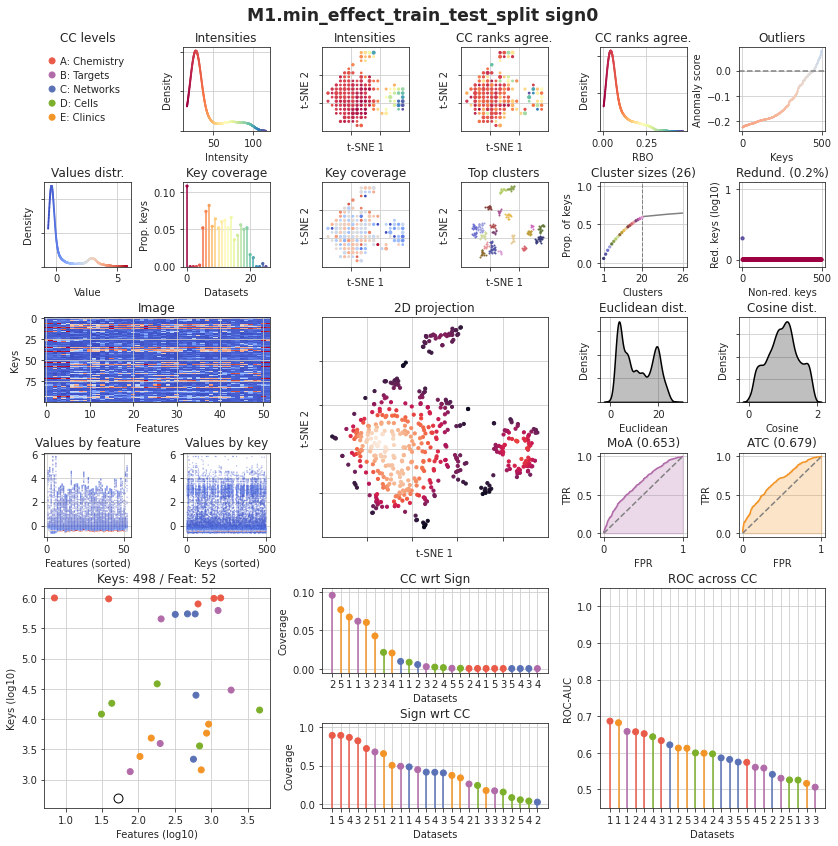

In [24]:
# Sign0 diagnostic plots
sign0 = cc_local.signature(dataset, 'sign0')
diag0 = sign0.diagnosis(ref_cctype='sign0')
diag0.canvas_medium()

### Signature 1

In [25]:
sign0 = cc_local.signature(dataset, 'sign0')
sign1 = cc_local.signature(dataset, 'sign1')
sign1.clear_all()

sign1.fit(sign0, overwrite=True, validations=False, metric_learning=False)

2022-07-12 16:56:55,891 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.min_effect_train_test_split/sign0
2022-07-12 16:56:55,893 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] New signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.min_effect_train_test_split/sign1
2022-07-12 16:56:55,938 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] New signature: /aloy/home/mlocatelli/code/local_cc_complete/reference/M/M1/M1.min_effect_train_test_split/sign1
2022-07-12 16:56:55,944 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Clearing signature /aloy/home/mlocatelli/code/local_cc_complete/reference/M/M1/M1.min_effect_train_test_split/sign1
2022-07-12 16:56:55,951 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.min_effect_train_test_split/sign1
2022-07-12 16:56:5

In [26]:
sign1 = cc_local.signature(dataset, 'sign1')
sign1.shape

2022-07-12 16:57:05,775 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.min_effect_train_test_split/sign1


(498, 12)

In [27]:
sign1_ref = cc_local.get_signature('sign1', 'reference', dataset)
sign1_ref.shape

2022-07-12 16:57:06,967 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/reference/M/M1/M1.min_effect_train_test_split/sign1


(497, 12)

2022-07-12 16:57:08,863 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.min_effect_train_test_split/sign1
2022-07-12 16:57:08,867 chemicalchecker.core.chemcheck.ChemicalChecker [DEBUG   ] ChemicalChecker with root: /aloy/home/mlocatelli/code/local_cc_complete
2022-07-12 16:57:09,007 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Cosine distances
2022-07-12 16:57:09,010 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Subsampling signature
2022-07-12 16:57:09,069 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Full dataset sampled (n=498)
2022-07-12 16:57:09,070 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching dataset V
2022-07-12 16:57:09,094 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Saving signature subsample /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.min_effect_train_test_split/sign1/diags/local_cc_complete_sign0/subsampled

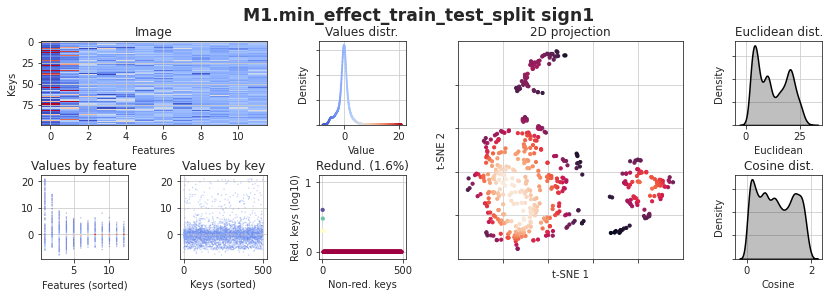

In [28]:
# Sign1 diagnostic plots
sign1 = cc_local.signature(dataset, 'sign1')
diag1 = sign1.diagnosis(ref_cctype='sign0')
diag1.canvas_small()

#### Signature 1 neighbors

In [29]:
sign1 = cc_local.signature(dataset, 'sign1')
neig1 = cc_local.signature(dataset, 'neig1')
neig1.clear_all()
neig1.fit(sign1)

2022-07-12 16:57:20,444 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.min_effect_train_test_split/sign1
2022-07-12 16:57:20,448 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] New signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.min_effect_train_test_split/neig1
2022-07-12 16:57:20,485 chemicalchecker.core.neig.neig [DEBUG   ] signature path is: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.min_effect_train_test_split/neig1
2022-07-12 16:57:20,486 chemicalchecker.core.neig.neig [DEBUG   ] data_path: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.min_effect_train_test_split/neig1/neig.h5
2022-07-12 16:57:20,487 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] New signature: /aloy/home/mlocatelli/code/local_cc_complete/reference/M/M1/M1.min_effect_train_test_split/neig1
2022-07-12 16:57:20,506 chemicalchecker.core.neig.neig [DEBUG

### Signature 2

In [30]:
sign2 = cc_local.signature(dataset,'sign2')
sign2.clear_all()
# TODO: check here if fit has to run on reference
sign2_ref = cc_local.get_signature('sign2','reference',dataset)
sign1 = cc_local.signature(dataset, 'sign1')
neig1 = cc_local.signature(dataset, 'neig1')
sign2_ref.fit(sign1,neig1, oos_predictor=False, overwrite=True, validations=False)

2022-07-12 16:57:29,748 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] New signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.min_effect_train_test_split/sign2
2022-07-12 16:57:29,755 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] New signature: /aloy/home/mlocatelli/code/local_cc_complete/reference/M/M1/M1.min_effect_train_test_split/sign2
2022-07-12 16:57:29,760 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Clearing signature /aloy/home/mlocatelli/code/local_cc_complete/reference/M/M1/M1.min_effect_train_test_split/sign2
2022-07-12 16:57:29,766 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.min_effect_train_test_split/sign2
2022-07-12 16:57:29,767 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Clearing signature /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.min_effect_train_test_split/sign2
2022-07-12 16:57:2

In [31]:
sign2 = cc_local.signature(dataset,'sign2')
sign2.shape

2022-07-12 16:57:50,106 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.min_effect_train_test_split/sign2


(498, 128)

2022-07-12 16:57:58,882 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.min_effect_train_test_split/sign2
2022-07-12 16:57:58,884 chemicalchecker.core.chemcheck.ChemicalChecker [DEBUG   ] ChemicalChecker with root: /aloy/home/mlocatelli/code/local_cc_complete
2022-07-12 16:57:59,005 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Cosine distances
2022-07-12 16:57:59,007 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Subsampling signature
2022-07-12 16:57:59,016 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Full dataset sampled (n=498)
2022-07-12 16:57:59,017 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching dataset V
2022-07-12 16:57:59,036 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Saving signature subsample /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.min_effect_train_test_split/sign2/diags/local_cc_complete_sign0/subsampled

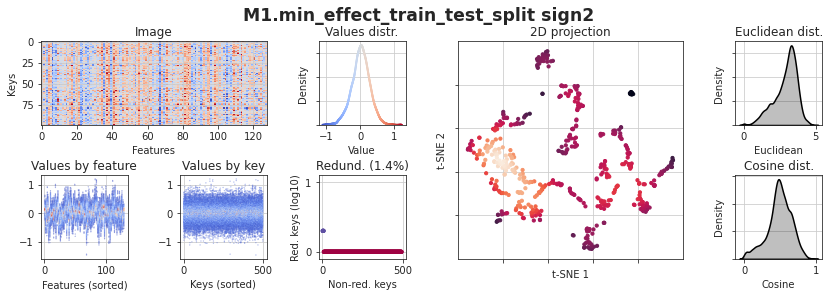

In [32]:
sign2 = cc_local.signature(dataset, 'sign2')
diag2 = sign2.diagnosis(ref_cctype='sign0')
diag2.canvas_small()

2022-07-12 16:58:23,437 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] ROC
2022-07-12 16:58:23,440 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.min_effect_train_test_split/sign0
2022-07-12 16:58:25,374 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.min_effect_train_test_split/sign0
2022-07-12 16:58:25,399 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching 498 rows from dataset V
2022-07-12 16:58:25,729 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching 498 rows from dataset V


<AxesSubplot:title={'center':'AUROC (0.892)'}, xlabel='FPR', ylabel='TPR'>

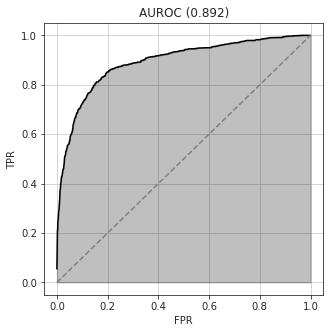

In [33]:
diag2.roc(dataset, 'sign0', plot=True, save=False)

### Signature 3

In [34]:
sign3 = cc_local.signature(dataset, 'sign3')
sign3.clear_all()

2022-07-12 16:58:49,901 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] New signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.min_effect_train_test_split/sign3
2022-07-12 16:58:49,926 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.min_effect_train_test_split/sign1
2022-07-12 16:58:49,929 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/reference/M/M1/M1.min_effect_train_test_split/sign1
2022-07-12 16:58:49,932 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/reference/M/M1/M1.min_effect_train_test_split/sign1
2022-07-12 16:58:49,934 chemicalchecker.core.sign1.sign1 [DEBUG   ] Reading triplets
2022-07-12 16:58:49,936 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli

In [35]:
sign2_list = list()
for ds in cc_local.coordinates:
    ds += '.001'
    sign2_list.append(cc_local.get_signature('sign2', 'full', ds))
# adding new space to CC
sign2_list.append(cc_local.get_signature('sign2','full',dataset))

2022-07-12 16:59:10,241 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/A/A1/A1.001/sign2
2022-07-12 16:59:10,245 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/A/A2/A2.001/sign2
2022-07-12 16:59:10,248 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/A/A3/A3.001/sign2
2022-07-12 16:59:10,251 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/A/A4/A4.001/sign2
2022-07-12 16:59:10,254 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/A/A5/A5.001/sign2
2022-07-12 16:59:10,257 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_

In [36]:
sign2_self = cc_local.signature(dataset, 'sign2')
sign1_self = cc_local.signature(dataset, 'sign1')

2022-07-12 16:59:23,208 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.min_effect_train_test_split/sign2
2022-07-12 16:59:23,211 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.min_effect_train_test_split/sign1


In [ ]:
sign3.fit_hpc(sign2_list, sign2_self, sign1_self, None, 'full', None, cpu=8, mem_by_core=4, plots_train=False)

2022-07-18 11:16:52.970113: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-07-18 11:17:00,074 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.min_effect_train_test_split/sign3
2022-07-18 11:17:00,078 chemicalchecker.core.chemcheck.ChemicalChecker [DEBUG   ] ChemicalChecker with root: /aloy/home/mlocatelli/code/local_cc_complete
2022-07-18 11:17:00,206 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] ROC
2022-07-18 11:17:00,208 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.min_effect_train_test_split/sign0
2022-07-18 11:17:02,381 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.min_effect_train_test_split/sign0
2022-07-18 11:17:06,588 chemic

<AxesSubplot:title={'center':'AUROC (0.670)'}, xlabel='FPR', ylabel='TPR'>

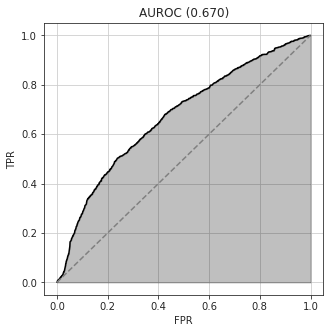

In [5]:
sign3 = cc_local.signature(dataset, 'sign3')
diag3 = sign3.diagnosis()
diag3.roc(dataset, 'sign0', save=False, plot=True)

2022-07-13 10:46:50,977 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Cosine distances
2022-07-13 10:46:50,985 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Subsampling signature
2022-07-13 10:46:50,986 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Subsampling dataset (n=10000)
2022-07-13 10:47:14,780 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Saving signature subsample /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.min_effect_train_test_split/sign3/diags/local_cc_complete_sign0/subsampled_data.pkl
2022-07-13 10:47:14,857 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Euclidean distances
2022-07-13 10:47:14,867 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Projection
2022-07-13 10:47:14,873 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Fit-transforming t-SNE
2022-07-13 10:47:14,873 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] First doing a PCA
2022-07-13 10:47:15,394 chemicalchecker.core.diagnostics.Di

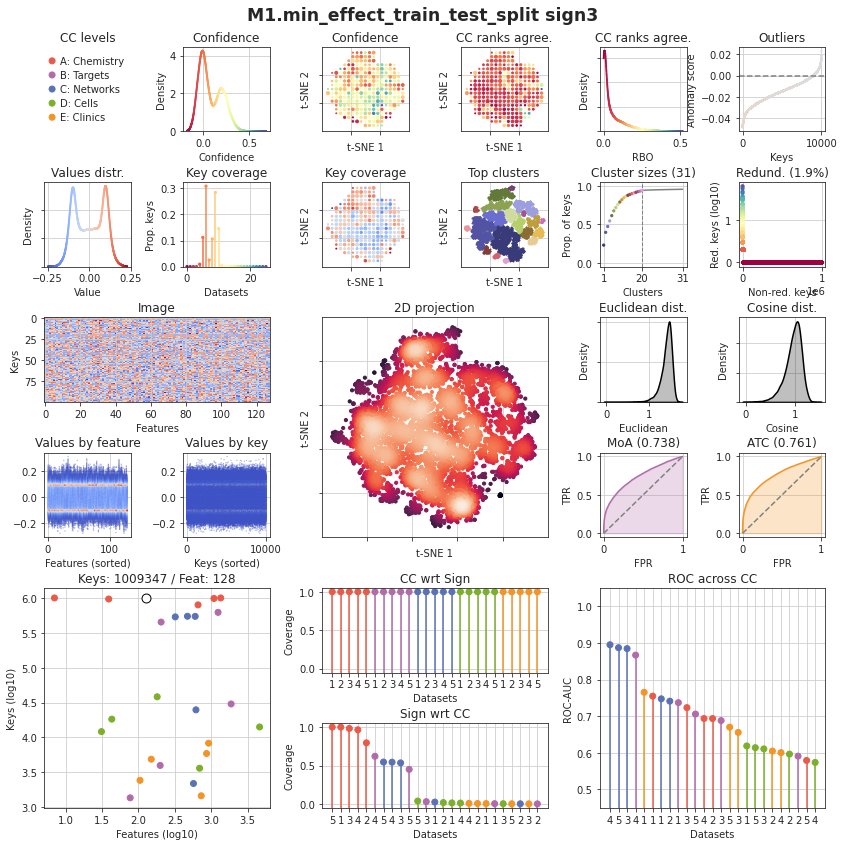

In [29]:
diag3.canvas_medium()

In [21]:
import random
random.seed(30)

X_orig, keys_orig = diag3._get_signatures(keys=df.index.values, max_keys=100000)
X_ab, keys_ab = diag3._get_signatures(keys=chembl_antibiotics_df['InChiKey'].values, max_keys=100000)
X_others, keys_others = diag3._get_signatures(keys=None, max_keys=100000)

from MulticoreTSNE import MulticoreTSNE as TSNE
from sklearn.decomposition import PCA

X, keys = diag3._get_signatures(keys=np.concatenate((keys_orig, keys_ab, keys_others), axis=None), max_keys=100000)
X = PCA(n_components=100).fit_transform(X)
init = PCA(n_components=2).fit_transform(X)
perp = int(np.sqrt(X.shape[0]))
perp = np.max([5, perp])
perp = np.min([50, perp])
print(perp)
tsne = TSNE(perplexity=perp, init=init, n_jobs=diag3.cpu)
P_ = tsne.fit_transform(X)
P = P_[:len(keys)]

maier_anno_df = pd.read_csv('../data/maier_anno_inchikey_df.csv')
maier_anno_df = maier_anno_df.set_index(maier_anno_df['InChiKey'].values)
p_data = pd.DataFrame(P, index=keys, columns=['V1', 'V2'])
p_data = p_data.join(maier_anno_df)

2022-07-14 15:26:31,813 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] 605 keys found
2022-07-14 15:26:31,834 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Fetching signatures
2022-07-14 15:26:31,835 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching 605 rows from dataset V
2022-07-14 15:26:36,077 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] 244 keys found
2022-07-14 15:26:36,078 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Fetching signatures
2022-07-14 15:26:36,079 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching 244 rows from dataset V
2022-07-14 15:26:38,760 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Loading signature subsample
2022-07-14 15:26:39,223 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] 10814 keys found
2022-07-14 15:26:39,247 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Fetching signatures
2022-07-14 15:26:39,248 chemicalchecker.core.signature_data.DataSignature [DEBUG   

50


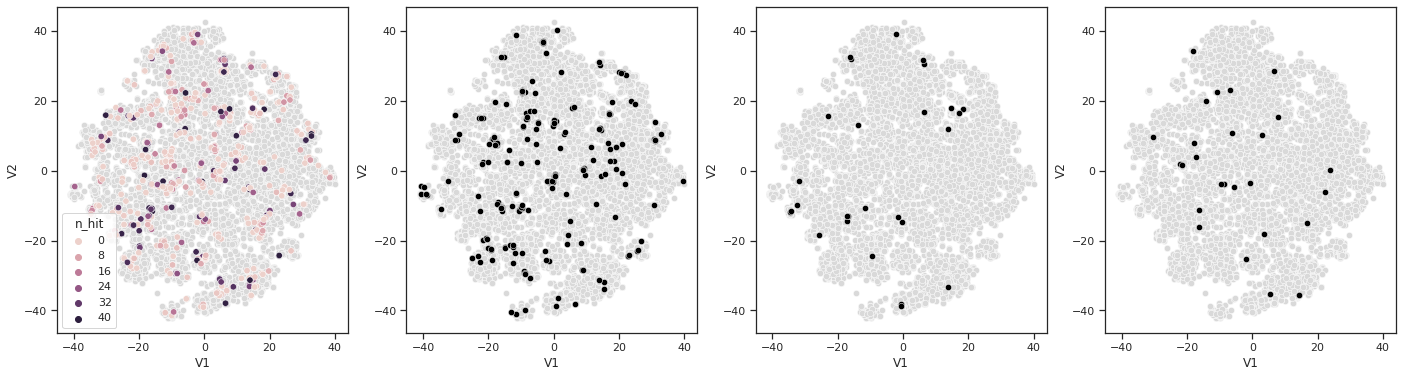

In [22]:
top_fungicidals_anno_df = pd.read_csv('../data/top30_fungicidal_inchikeys_spitzer.csv')
a_muciniphilia_anno_df = pd.read_csv('../data/amuciniphilia_inchikeys_df.csv')

sns.set(rc={"figure.figsize":(24, 6)})
sns.set_theme(style="ticks")

fig, ax =plt.subplots(1,4)
sns.scatterplot(x='V1', y='V2', data=p_data, s=40, color=".85", ax=ax[0])
sns.scatterplot(x='V1', y='V2', data=p_data.dropna(), s=40, hue='n_hit',ax=ax[0])
sns.scatterplot(x='V1', y='V2', data=p_data, s=40, color=".85", ax=ax[1])
sns.scatterplot(x='V1', y='V2', data=p_data[p_data.index.isin(chembl_antibiotics_df['InChiKey'])], s=40, color="0", ax=ax[1])
sns.scatterplot(x='V1', y='V2', data=p_data, s=40, color=".85", ax=ax[2])
sns.scatterplot(x='V1', y='V2', data=p_data[p_data.index.isin(top_fungicidals_anno_df['InChiKey'])], s=40, color="0", ax=ax[2])
sns.scatterplot(x='V1', y='V2', data=p_data, s=40, color=".85", ax=ax[3])
sns.scatterplot(x='V1', y='V2', data=p_data[p_data.index.isin(a_muciniphilia_anno_df['InChiKeys'])], s=40, color="0", ax=ax[3])
fig.show()

### Signature 4

In [6]:
sign4 = cc_local.signature(dataset, 'sign4')
sign4.clear_all()

2022-07-18 11:23:42,117 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] New signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.min_effect_train_test_split/sign4
2022-07-18 11:23:42,192 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] New signature: /aloy/home/mlocatelli/code/local_cc_complete/reference/M/M1/M1.min_effect_train_test_split/sign4
2022-07-18 11:23:42,226 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Clearing signature /aloy/home/mlocatelli/code/local_cc_complete/reference/M/M1/M1.min_effect_train_test_split/sign4
2022-07-18 11:23:42,235 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.min_effect_train_test_split/sign4
2022-07-18 11:23:42,237 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Clearing signature /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.min_effect_train_test_split/sign4


In [7]:
sign4.fit_hpc(None,None,None,True,False,cpu=8, mem_by_core=8)

2022-07-18 11:24:07,453 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] CC_Config for function fit is: /aloy/home/nkurzawa/cc_config.json
2022-07-18 11:24:07,455 chemicalchecker.util.config.config.Config [DEBUG   ] Loading config from: /aloy/home/nkurzawa/cc_config.json
2022-07-18 11:24:07,494 chemicalchecker.util.hpc.hpc.HPC [DEBUG   ] HPC system to use: sge
2022-07-18 11:24:07,495 chemicalchecker.util.hpc.hpc.HPC [DEBUG   ] initializing object sge
2022-07-18 11:24:08,845 chemicalchecker.util.hpc.sge.sge [DEBUG   ] Job name is: sign4_fit_hpc.py
2022-07-18 11:24:08,846 chemicalchecker.util.hpc.sge.sge [INFO    ] Writing file /aloy/scratch/nkurzawa/tmp_jobs/tmp_3cebidds/job-sign4_fit_hpc.py.sh...
2022-07-18 11:24:08,849 chemicalchecker.util.hpc.sge.sge [DEBUG   ] HPC submission: qsub -terse  -q all.q /aloy/scratch/nkurzawa/tmp_jobs/tmp_3cebidds/job-sign4_fit_hpc.py.sh
2022-07-18 11:24:11,249 chemicalchecker.util.hpc.sge.sge [DEBUG   ] Job id: 766973


2022-07-19 10:21:00.963931: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-07-19 10:21:04,769 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.min_effect_train_test_split/sign4
2022-07-19 10:21:04,770 chemicalchecker.core.chemcheck.ChemicalChecker [DEBUG   ] ChemicalChecker with root: /aloy/home/mlocatelli/code/local_cc_complete
2022-07-19 10:21:04,957 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] ROC
2022-07-19 10:21:04,961 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.min_effect_train_test_split/sign0
2022-07-19 10:21:07,697 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.min_effect_train_test_split/sign0
2022-07-19 10:21:11,438 chemic

<AxesSubplot:title={'center':'AUROC (0.648)'}, xlabel='FPR', ylabel='TPR'>

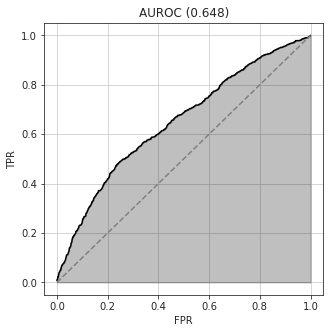

In [8]:
sign4 = cc_local.signature(dataset, 'sign4')
diag4 = sign4.diagnosis()
diag4.roc(dataset, 'sign0', save=False, plot=True)

2022-07-19 10:21:45,149 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Cosine distances
2022-07-19 10:21:45,151 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Subsampling signature
2022-07-19 10:21:45,151 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Subsampling dataset (n=10000)
2022-07-19 10:22:00,372 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Saving signature subsample /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.min_effect_train_test_split/sign4/diags/local_cc_complete_sign0/subsampled_data.pkl
2022-07-19 10:22:00,440 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Euclidean distances
2022-07-19 10:22:00,450 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Projection
2022-07-19 10:22:00,454 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Fit-transforming t-SNE
2022-07-19 10:22:00,454 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] First doing a PCA
2022-07-19 10:22:00,649 chemicalchecker.core.diagnostics.Di

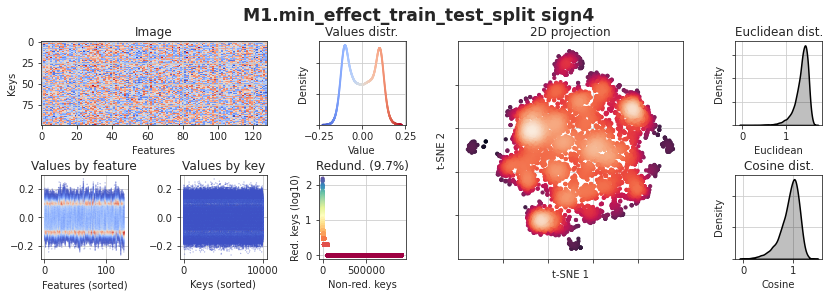

In [9]:
diag4.canvas_small()

In [10]:
from MulticoreTSNE import MulticoreTSNE as TSNE
from sklearn.decomposition import PCA

X_orig, keys_orig = diag4._get_signatures(keys=df.index.values, max_keys=100000)

X_ab, keys_ab = diag4._get_signatures(keys=chembl_antibiotics_df['InChiKey'].values, max_keys=100000)
X_others, keys_others = diag4._get_signatures(keys=None, max_keys=100000)

X, keys = diag4._get_signatures(keys=np.concatenate((keys_orig, keys_ab, keys_others, 'FNOKZRYCHPSURW-WFXFPESJSA-N'), axis=None), 
                                max_keys=100000)
X_pca = PCA(n_components=100).fit_transform(X)
init = PCA(n_components=2).fit_transform(X_pca)
perp = int(np.sqrt(X.shape[0]))
perp = np.max([5, perp])
perp = np.min([50, perp])
print(perp)
tsne = TSNE(perplexity=perp, init=init, n_jobs=diag4.cpu)
P_ = tsne.fit_transform(X_pca)
P = P_[:len(keys)]

maier_anno_df = pd.read_csv('../data/maier_anno_inchikey_df.csv')
maier_anno_df = maier_anno_df.set_index(maier_anno_df['InChiKey'].values)
p_data = pd.DataFrame(P, index=keys, columns=['V1', 'V2'])
p_data = p_data.join(maier_anno_df)

2022-07-19 10:33:59,509 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] 551 keys found
2022-07-19 10:33:59,511 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Fetching signatures
2022-07-19 10:33:59,511 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching 551 rows from dataset V
2022-07-19 10:34:04,907 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] 236 keys found
2022-07-19 10:34:04,908 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Fetching signatures
2022-07-19 10:34:04,909 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching 236 rows from dataset V
2022-07-19 10:34:08,513 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] 10761 keys found
2022-07-19 10:34:08,526 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Fetching signatures
2022-07-19 10:34:08,526 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching 10761 rows from dataset V


50


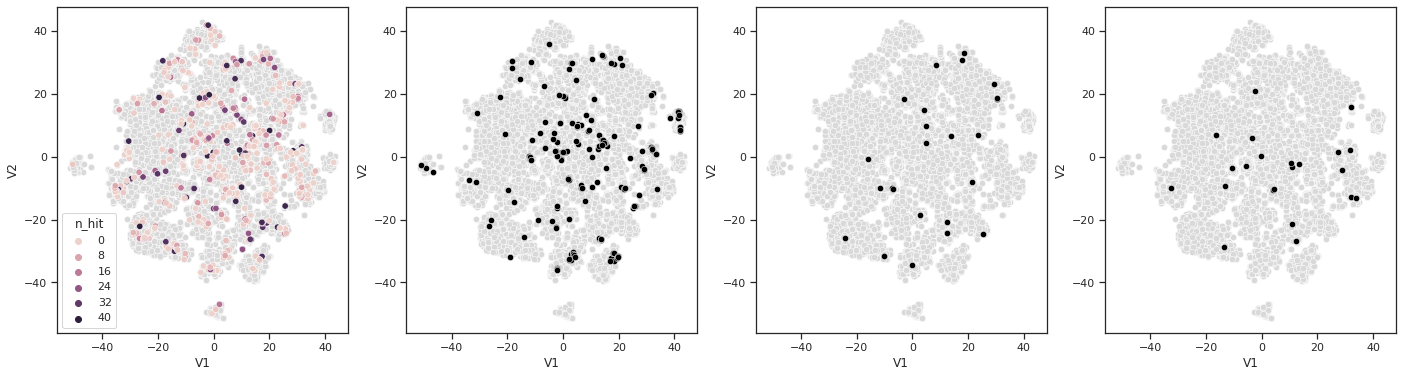

In [11]:
top_fungicidals_anno_df = pd.read_csv('../data/top30_fungicidal_inchikeys_spitzer.csv')
a_muciniphilia_anno_df = pd.read_csv('../data/amuciniphilia_inchikeys_df.csv')

sns.set(rc={"figure.figsize":(24, 6)})
sns.set_theme(style="ticks")

fig, ax =plt.subplots(1,4)
sns.scatterplot(x='V1', y='V2', data=p_data, s=40, color=".85", ax=ax[0])
sns.scatterplot(x='V1', y='V2', data=p_data.dropna(), s=40, hue='n_hit',ax=ax[0])
sns.scatterplot(x='V1', y='V2', data=p_data, s=40, color=".85", ax=ax[1])
sns.scatterplot(x='V1', y='V2', data=p_data[p_data.index.isin(chembl_antibiotics_df['InChiKey'])], s=40, color="0", ax=ax[1])
sns.scatterplot(x='V1', y='V2', data=p_data, s=40, color=".85", ax=ax[2])
sns.scatterplot(x='V1', y='V2', data=p_data[p_data.index.isin(top_fungicidals_anno_df['InChiKey'])], s=40, color="0", ax=ax[2])
sns.scatterplot(x='V1', y='V2', data=p_data, s=40, color=".85", ax=ax[3])
sns.scatterplot(x='V1', y='V2', data=p_data[p_data.index.isin(a_muciniphilia_anno_df['InChiKeys'])], s=40, color="0", ax=ax[3])
fig.show()

In [ ]:
# get sign4 values for all compounds of the original dataset
compound_mapping_df = pd.read_csv('../data/compound_name_smiles_inchi_corrected_inchikeys_df.csv')
train_smiles = compound_mapping_df[compound_mapping_df.InChiKey.isin(X_train.index)]['SMILES_id'].to_list()
test_smiles = compound_mapping_df[compound_mapping_df.InChiKey.isin(X_test.index)]['SMILES_id'].to_list()

train_dest_file = '../data/M1_sign4_train_test_split_cc_triplets_train_data.h5'
test_dest_file = '../data/M1_sign4_train_test_split_cc_triplets_test_data.h5'

sign4.predict_from_smiles(train_smiles, dest_file=train_dest_file)
sign4.predict_from_smiles(test_smiles, dest_file=test_dest_file)

In [19]:
# save as csv file
train_h5 = DataSignature(train_dest_file)
train_df = pd.DataFrame(train_h5.get_h5_dataset('V'))
train_df['SMILES_id'] = train_smiles
train_df = train_df.merge(compound_mapping_df, how='left', on='SMILES_id')
train_df.to_csv('../data/M1_sign4_train_test_split_cc_triplets_train_data.csv')

test_h5 = DataSignature(test_dest_file)
test_df = pd.DataFrame(test_h5.get_h5_dataset('V'))
test_df['SMILES_id'] = test_smiles
test_df = test_df.merge(compound_mapping_df, how='left', on='SMILES_id')
test_df.to_csv('../data/M1_sign4_train_test_split_cc_triplets_test_data.csv')

2022-07-19 10:48:42,675 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching dataset V
2022-07-19 10:48:42,805 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching dataset V


## Using manual triplets

In [24]:
dataset = 'M1.min_effect_train_test_split_manual_split'

In [7]:
s2 = cc_local.signature(dataset,'sign2')

2022-07-13 10:13:04.002963: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-07-13 10:13:08,003 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.min_effect_train_test_split_manual_split/sign2


In [8]:
ink_pos = dict(zip(s2.keys, np.arange(len(s2.keys))))

In [9]:
s2_train_mat = DataSignature('/aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.min_effect_train_test_split/sign3/models/train.h5')

In [10]:
s2_train_mat.info_h5

{'keys': (498,), 'x': (498, 3328)}

In [11]:
triplet_ink_matrix = s2_train_mat.get_h5_dataset('x')

2022-07-13 10:13:17,525 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching dataset x


In [12]:
triplet_ink_matrix

array([[-0.15185289,  0.06739662, -0.43352956, ..., -0.466243  ,
        -0.159209  , -0.18045   ],
       [-0.16515847,  0.14874065, -0.4173473 , ..., -0.127405  ,
        -0.00133307, -0.232652  ],
       [-0.20419961,  0.67670023, -0.20861593, ..., -0.0756747 ,
        -0.140121  ,  0.160674  ],
       ...,
       [-0.08134206,  0.00610325, -0.19760148, ..., -0.407855  ,
        -0.10104   , -0.0375308 ],
       [-0.03860568,  0.34497812, -0.19644824, ...,  0.231119  ,
         0.108873  , -0.260317  ],
       [-0.39090768,  0.10366904,  0.22041193, ..., -0.0264263 ,
        -0.00120077, -0.13015   ]], dtype=float32)

In [13]:
triplet_ink_keys = s2_train_mat.get_h5_dataset('keys')

2022-07-13 10:13:20,728 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching dataset keys


In [ ]:
triplet_ink_keys

In [15]:
manual_triplets = pd.read_csv('./maier_spitzer_fil_train_triplets.tsv.gz', sep='\t')

In [16]:
manual_triplets['anchor'].values

array(['AADCDMQTJNYOSS-LBPRGKRZSA-N', 'AADCDMQTJNYOSS-LBPRGKRZSA-N',
       'AADCDMQTJNYOSS-LBPRGKRZSA-N', ..., 'ZYSCHNVPUOSLNC-BTJKTKAUSA-N',
       'ZYSCHNVPUOSLNC-BTJKTKAUSA-N', 'ZYSCHNVPUOSLNC-BTJKTKAUSA-N'],
      dtype=object)

In [17]:
triplet_array = np.vectorize(ink_pos.get)(manual_triplets.values)

In [18]:
triplet_array

array([[  0,  14,   0],
       [  0,  14,   0],
       [  0,  14,  10],
       ...,
       [497, 478, 479],
       [497, 478, 486],
       [497, 478, 491]])

### Signature 3

In [19]:
dataset

'M1.min_effect_train_test_split_manual_split'

In [20]:
sign3 = cc_local.signature(dataset, 'sign3')
sign3.clear_all()

2022-07-13 10:13:49,818 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.min_effect_train_test_split_manual_split/sign3
2022-07-13 10:13:49,831 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] New signature: /aloy/home/mlocatelli/code/local_cc_complete/reference/M/M1/M1.min_effect_train_test_split_manual_split/sign3
2022-07-13 10:13:49,854 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] New signature: /aloy/home/mlocatelli/code/local_cc_complete/reference/M/M1/M1.min_effect_train_test_split_manual_split/sign1
2022-07-13 10:13:49,859 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/reference/M/M1/M1.min_effect_train_test_split_manual_split/sign1
2022-07-13 10:13:49,859 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/referenc

In [21]:
from chemicalchecker.util.splitter import NeighborTripletTraintest

In [22]:
NeighborTripletTraintest.precomputed_triplets(X=triplet_ink_matrix, ink_keys=triplet_ink_keys, triplets=triplet_array, 
                    out_file='/aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.min_effect_train_test_split_manual_split/sign3/models/traintest_eval.h5')

[INFO    ] Loading faiss with AVX2 support.
[INFO    ] Successfully loaded faiss with AVX2 support.
2022-07-13 10:14:20,888 chemicalchecker.util.splitter.neighbortriplet.NeighborTripletTraintest [INFO    ] Traintest saving to /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.min_effect_train_test_split_manual_split/sign3/models/traintest_eval.h5
2022-07-13 10:14:22,614 chemicalchecker.util.splitter.neighbortriplet.NeighborTripletTraintest [INFO    ] NeighborTripletTraintest saved to /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.min_effect_train_test_split_manual_split/sign3/models/traintest_eval.h5


In [23]:
NeighborTripletTraintest.precomputed_triplets(X=triplet_ink_matrix, ink_keys=triplet_ink_keys, triplets=triplet_array, split_names=['train'], split_fractions=[1.0], suffix='final',
                    out_file='/aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.min_effect_train_test_split_manual_split/sign3/models/traintest_final.h5')

2022-07-13 10:14:25,397 chemicalchecker.util.splitter.neighbortriplet.NeighborTripletTraintest [INFO    ] Traintest saving to /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.min_effect_train_test_split_manual_split/sign3/models/traintest_final.h5
2022-07-13 10:14:26,102 chemicalchecker.util.splitter.neighbortriplet.NeighborTripletTraintest [INFO    ] NeighborTripletTraintest saved to /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.min_effect_train_test_split_manual_split/sign3/models/traintest_final.h5


In [24]:
sign2_list = list()
for ds in cc_local.coordinates:
    ds += '.001'
    sign2_list.append(cc_local.get_signature('sign2', 'full', ds))
# adding new space to CC
sign2_list.append(cc_local.get_signature('sign2','full',dataset))

2022-07-13 10:14:47,919 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/A/A1/A1.001/sign2
2022-07-13 10:14:47,921 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/A/A2/A2.001/sign2
2022-07-13 10:14:47,924 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/A/A3/A3.001/sign2
2022-07-13 10:14:47,926 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/A/A4/A4.001/sign2
2022-07-13 10:14:47,929 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/A/A5/A5.001/sign2
2022-07-13 10:14:47,932 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_

In [25]:
sign2_self = cc_local.signature(dataset, 'sign2')
sign1_self = cc_local.signature(dataset, 'sign1')

2022-07-13 10:14:51,506 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.min_effect_train_test_split_manual_split/sign2
2022-07-13 10:14:51,507 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.min_effect_train_test_split_manual_split/sign1


In [26]:
sign3.fit_hpc(sign2_list, sign2_self, sign1_self, None, 'full', None, cpu=8, mem_by_core=4, plots_train=False)

2022-07-13 10:15:01,078 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] CC_Config for function fit is: /aloy/home/nkurzawa/cc_config.json
2022-07-13 10:15:01,079 chemicalchecker.util.config.config.Config [DEBUG   ] Loading config from: /aloy/home/nkurzawa/cc_config.json
2022-07-13 10:15:01,410 chemicalchecker.util.hpc.hpc.HPC [DEBUG   ] HPC system to use: sge
2022-07-13 10:15:01,411 chemicalchecker.util.hpc.hpc.HPC [DEBUG   ] initializing object sge
2022-07-13 10:15:02,698 chemicalchecker.util.hpc.sge.sge [DEBUG   ] Job name is: sign3_fit_hpc.py
2022-07-13 10:15:02,700 chemicalchecker.util.hpc.sge.sge [INFO    ] Writing file /aloy/scratch/nkurzawa/tmp_jobs/tmp_o3hfolgs/job-sign3_fit_hpc.py.sh...
2022-07-13 10:15:02,703 chemicalchecker.util.hpc.sge.sge [DEBUG   ] HPC submission: qsub -terse  -q all.q /aloy/scratch/nkurzawa/tmp_jobs/tmp_o3hfolgs/job-sign3_fit_hpc.py.sh
2022-07-13 10:15:05,113 chemicalchecker.util.hpc.sge.sge [DEBUG   ] Job id: 766940


2022-07-14 15:40:44,009 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.min_effect_train_test_split_manual_split/sign3
2022-07-14 15:40:44,015 chemicalchecker.core.chemcheck.ChemicalChecker [DEBUG   ] ChemicalChecker with root: /aloy/home/mlocatelli/code/local_cc_complete
2022-07-14 15:40:44,192 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] ROC
2022-07-14 15:40:44,194 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.min_effect_train_test_split_manual_split/sign0
2022-07-14 15:40:49,722 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.min_effect_train_test_split_manual_split/sign0
2022-07-14 15:40:53,382 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching 498 rows from dataset V
2022-07-14 15:40:53

<AxesSubplot:title={'center':'AUROC (0.935)'}, xlabel='FPR', ylabel='TPR'>

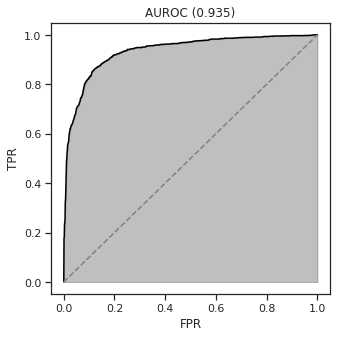

In [27]:
sign3 = cc_local.signature(dataset, 'sign3')
diag3 = sign3.diagnosis()
diag3.roc(dataset, 'sign0', save=False, plot=True)

In [28]:
import random
random.seed(30)

X_orig, keys_orig = diag3._get_signatures(keys=df.index.values, max_keys=100000)
X_ab, keys_ab = diag3._get_signatures(keys=chembl_antibiotics_df['InChiKey'].values, max_keys=100000)
X_others, keys_others = diag3._get_signatures(keys=None, max_keys=100000)

from MulticoreTSNE import MulticoreTSNE as TSNE
from sklearn.decomposition import PCA

X, keys = diag3._get_signatures(keys=np.concatenate((keys_orig, keys_ab, keys_others), axis=None), max_keys=100000)
X = PCA(n_components=100).fit_transform(X)
init = PCA(n_components=2).fit_transform(X)
perp = int(np.sqrt(X.shape[0]))
perp = np.max([5, perp])
perp = np.min([50, perp])
print(perp)
tsne = TSNE(perplexity=perp, init=init, n_jobs=diag3.cpu)
P_ = tsne.fit_transform(X)
P = P_[:len(keys)]

maier_anno_df = pd.read_csv('../data/maier_anno_inchikey_df.csv')
maier_anno_df = maier_anno_df.set_index(maier_anno_df['InChiKey'].values)
p_data = pd.DataFrame(P, index=keys, columns=['V1', 'V2'])
p_data = p_data.join(maier_anno_df)

2022-07-14 15:41:02,923 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] 605 keys found
2022-07-14 15:41:02,924 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Fetching signatures
2022-07-14 15:41:02,924 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching 605 rows from dataset V
2022-07-14 15:41:05,066 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] 244 keys found
2022-07-14 15:41:05,067 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Fetching signatures
2022-07-14 15:41:05,067 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching 244 rows from dataset V
2022-07-14 15:41:07,339 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Loading signature subsample
2022-07-14 15:41:07,803 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] 10814 keys found
2022-07-14 15:41:07,815 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Fetching signatures
2022-07-14 15:41:07,815 chemicalchecker.core.signature_data.DataSignature [DEBUG   

50


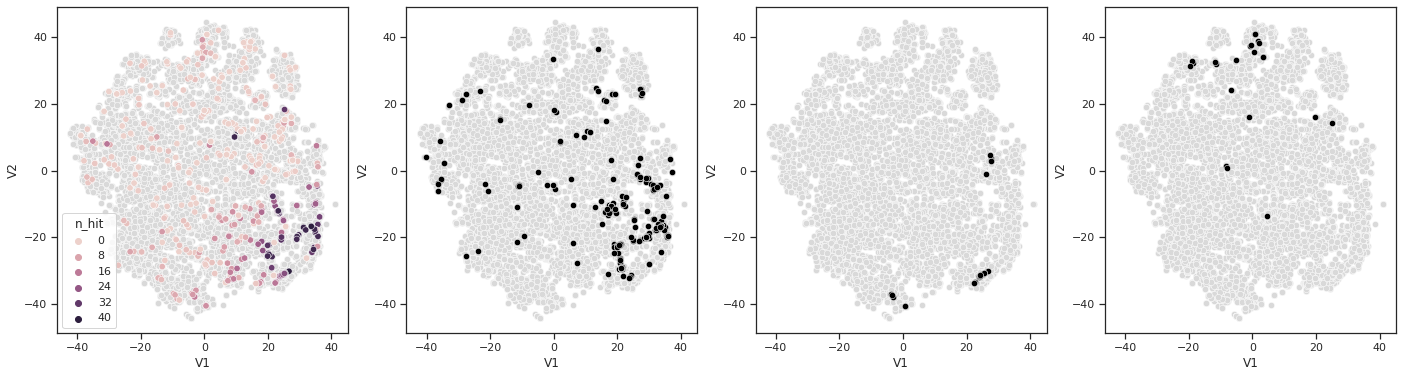

In [29]:
top_fungicidals_anno_df = pd.read_csv('../data/top30_fungicidal_inchikeys_spitzer.csv')
a_muciniphilia_anno_df = pd.read_csv('../data/amuciniphilia_inchikeys_df.csv')

sns.set(rc={"figure.figsize":(24, 6)})
sns.set_theme(style="ticks")

fig, ax =plt.subplots(1,4)
sns.scatterplot(x='V1', y='V2', data=p_data, s=40, color=".85", ax=ax[0])
sns.scatterplot(x='V1', y='V2', data=p_data.dropna(), s=40, hue='n_hit',ax=ax[0])
sns.scatterplot(x='V1', y='V2', data=p_data, s=40, color=".85", ax=ax[1])
sns.scatterplot(x='V1', y='V2', data=p_data[p_data.index.isin(chembl_antibiotics_df['InChiKey'])], s=40, color="0", ax=ax[1])
sns.scatterplot(x='V1', y='V2', data=p_data, s=40, color=".85", ax=ax[2])
sns.scatterplot(x='V1', y='V2', data=p_data[p_data.index.isin(top_fungicidals_anno_df['InChiKey'])], s=40, color="0", ax=ax[2])
sns.scatterplot(x='V1', y='V2', data=p_data, s=40, color=".85", ax=ax[3])
sns.scatterplot(x='V1', y='V2', data=p_data[p_data.index.isin(a_muciniphilia_anno_df['InChiKeys'])], s=40, color="0", ax=ax[3])
fig.show()

In [30]:
import random
random.seed(30)


from MulticoreTSNE import MulticoreTSNE as TSNE
from sklearn.decomposition import PCA

X, keys = diag3._get_signatures(keys=df.index.values, max_keys=100000)
X = PCA(n_components=100).fit_transform(X)
init = PCA(n_components=2).fit_transform(X)
perp = int(np.sqrt(X.shape[0]))
perp = np.max([5, perp])
perp = np.min([50, perp])
print(perp)
tsne = TSNE(perplexity=perp, init=init, n_jobs=diag3.cpu)
P_ = tsne.fit_transform(X)
P = P_[:len(keys)]

maier_anno_df = pd.read_csv('../data/maier_anno_inchikey_df.csv')
maier_anno_df = maier_anno_df.set_index(maier_anno_df['InChiKey'].values)
p_data = pd.DataFrame(P, index=keys, columns=['V1', 'V2'])
p_data = p_data.join(maier_anno_df)

2022-07-14 15:42:45,698 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] 605 keys found
2022-07-14 15:42:45,700 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Fetching signatures
2022-07-14 15:42:45,701 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching 605 rows from dataset V


24


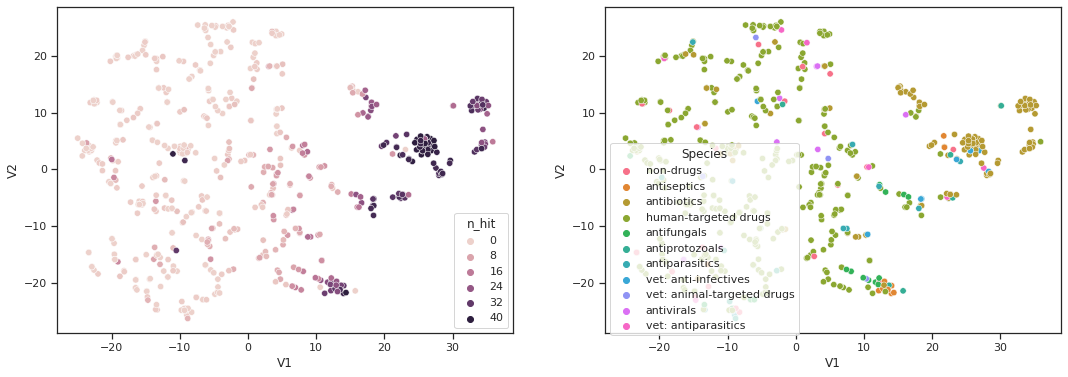

In [32]:
top_fungicidals_anno_df = pd.read_csv('../data/top30_fungicidal_inchikeys_spitzer.csv')
a_muciniphilia_anno_df = pd.read_csv('../data/amuciniphilia_inchikeys_df.csv')

sns.set(rc={"figure.figsize":(18, 6)})
sns.set_theme(style="ticks")

fig, ax =plt.subplots(1,2)
#sns.scatterplot(x='V1', y='V2', data=p_data, s=40, color=".85", ax=ax[0])
sns.scatterplot(x='V1', y='V2', data=p_data.dropna(), s=40, hue='n_hit',ax=ax[0])
#sns.scatterplot(x='V1', y='V2', data=p_data, s=40, color=".85", ax=ax[1])
g = sns.scatterplot(x='V1', y='V2', data=p_data.dropna(), s=40, hue='drug_class',ax=ax[1])
sns.move_legend(g, "upper left", bbox_to_anchor=(0, .6), title='Species')
fig.show()

In [34]:
p_data.to_csv('../data/M1_manual_triplets_train_projection.csv')

2022-07-14 09:25:31,075 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Cosine distances
2022-07-14 09:25:31,087 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Euclidean distances
2022-07-14 09:25:31,094 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Projection
2022-07-14 09:25:31,095 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Fit-transforming t-SNE
2022-07-14 09:25:31,095 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] First doing a PCA
2022-07-14 09:25:31,207 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Chosen perplexity 50
2022-07-14 09:26:07,725 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Image
2022-07-14 09:26:07,728 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Features bins
2022-07-14 09:26:07,835 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Keys bins
2022-07-14 09:26:08,261 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Values
2022-07-14 09:26:08,479 chemicalchecker.core.diagnostics.Diagnosis [DEBUG

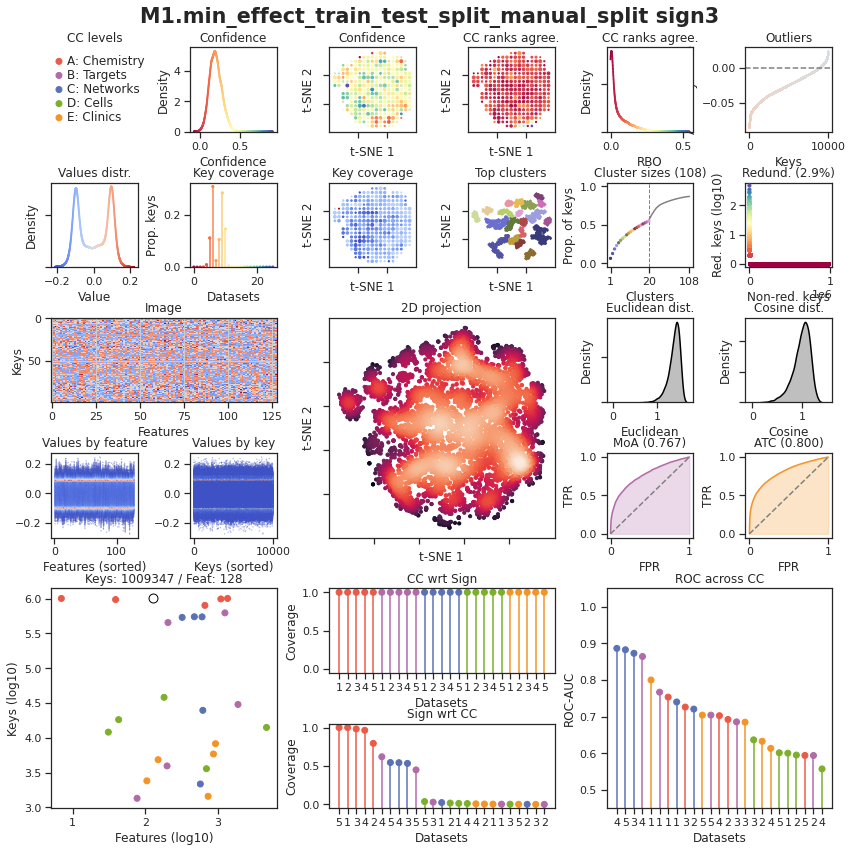

In [10]:
diag3.canvas_medium()

### Signature 4

In [11]:
sign4 = cc_local.signature(dataset, 'sign4')
sign4.clear_all()

2022-07-14 10:12:05,292 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] New signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.min_effect_train_test_split_manual_split/sign4
2022-07-14 10:12:05,319 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] New signature: /aloy/home/mlocatelli/code/local_cc_complete/reference/M/M1/M1.min_effect_train_test_split_manual_split/sign4
2022-07-14 10:12:05,361 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Clearing signature /aloy/home/mlocatelli/code/local_cc_complete/reference/M/M1/M1.min_effect_train_test_split_manual_split/sign4
2022-07-14 10:12:05,369 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.min_effect_train_test_split_manual_split/sign4
2022-07-14 10:12:05,370 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Clearing signature /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.

In [12]:
sign4.fit_hpc(None,None,None,True,False,cpu=8, mem_by_core=8)

2022-07-14 10:12:08,682 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] CC_Config for function fit is: /aloy/home/nkurzawa/cc_config.json
2022-07-14 10:12:08,683 chemicalchecker.util.config.config.Config [DEBUG   ] Loading config from: /aloy/home/nkurzawa/cc_config.json
2022-07-14 10:12:08,714 chemicalchecker.util.hpc.hpc.HPC [DEBUG   ] HPC system to use: sge
2022-07-14 10:12:08,715 chemicalchecker.util.hpc.hpc.HPC [DEBUG   ] initializing object sge
2022-07-14 10:12:09,431 chemicalchecker.util.hpc.sge.sge [DEBUG   ] Job name is: sign4_fit_hpc.py
2022-07-14 10:12:09,433 chemicalchecker.util.hpc.sge.sge [INFO    ] Writing file /aloy/scratch/nkurzawa/tmp_jobs/tmp_4k764iog/job-sign4_fit_hpc.py.sh...
2022-07-14 10:12:09,438 chemicalchecker.util.hpc.sge.sge [DEBUG   ] HPC submission: qsub -terse  -q all.q /aloy/scratch/nkurzawa/tmp_jobs/tmp_4k764iog/job-sign4_fit_hpc.py.sh
2022-07-14 10:12:11,825 chemicalchecker.util.hpc.sge.sge [DEBUG   ] Job id: 766944


2022-07-14 16:12:11,109 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.min_effect_train_test_split_manual_split/sign4
2022-07-14 16:12:11,111 chemicalchecker.core.chemcheck.ChemicalChecker [DEBUG   ] ChemicalChecker with root: /aloy/home/mlocatelli/code/local_cc_complete
2022-07-14 16:12:11,679 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] ROC
2022-07-14 16:12:11,682 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.min_effect_train_test_split_manual_split/sign0
2022-07-14 16:12:17,834 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.min_effect_train_test_split_manual_split/sign0
2022-07-14 16:12:20,983 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching 444 rows from dataset V
2022-07-14 16:12:21

<AxesSubplot:title={'center':'AUROC (0.923)'}, xlabel='FPR', ylabel='TPR'>

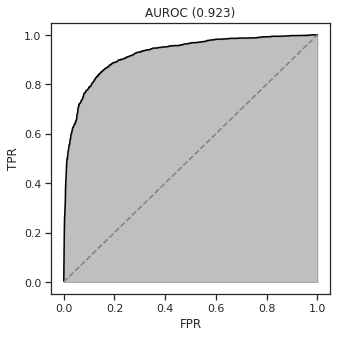

In [35]:
sign4 = cc_local.signature(dataset, 'sign4')
diag4 = sign4.diagnosis()
diag4.roc(dataset, 'sign0', save=False, plot=True)

2022-07-14 16:12:45,187 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Cosine distances
2022-07-14 16:12:45,190 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Subsampling signature
2022-07-14 16:12:45,191 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Subsampling dataset (n=10000)
2022-07-14 16:12:58,352 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Saving signature subsample /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.min_effect_train_test_split_manual_split/sign4/diags/local_cc_complete_sign0/subsampled_data.pkl
2022-07-14 16:12:58,489 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Euclidean distances
2022-07-14 16:12:58,540 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Projection
2022-07-14 16:12:58,541 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Fit-transforming t-SNE
2022-07-14 16:12:58,541 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] First doing a PCA
2022-07-14 16:12:58,651 chemicalchecker.core.d

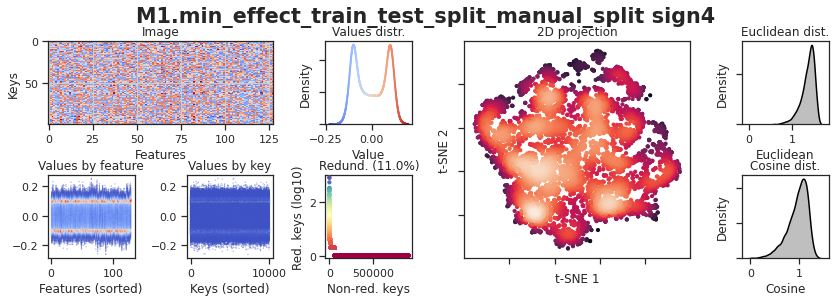

In [36]:
diag4.canvas_small()

In [37]:
from MulticoreTSNE import MulticoreTSNE as TSNE
from sklearn.decomposition import PCA

X_orig, keys_orig = diag4._get_signatures(keys=df.index.values, max_keys=100000)

X_ab, keys_ab = diag4._get_signatures(keys=chembl_antibiotics_df['InChiKey'].values, max_keys=100000)
X_others, keys_others = diag4._get_signatures(keys=None, max_keys=100000)

X, keys = diag4._get_signatures(keys=np.concatenate((keys_orig, keys_ab, keys_others, 'FNOKZRYCHPSURW-WFXFPESJSA-N'), axis=None), 
                                max_keys=100000)
X_pca = PCA(n_components=100).fit_transform(X)
init = PCA(n_components=2).fit_transform(X_pca)
perp = int(np.sqrt(X.shape[0]))
perp = np.max([5, perp])
perp = np.min([50, perp])
print(perp)
tsne = TSNE(perplexity=perp, init=init, n_jobs=diag4.cpu)
P_ = tsne.fit_transform(X_pca)
P = P_[:len(keys)]

maier_anno_df = pd.read_csv('../data/maier_anno_inchikey_df.csv')
maier_anno_df = maier_anno_df.set_index(maier_anno_df['InChiKey'].values)
p_data = pd.DataFrame(P, index=keys, columns=['V1', 'V2'])
p_data = p_data.join(maier_anno_df)

2022-07-14 16:14:29,485 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] 551 keys found
2022-07-14 16:14:29,487 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Fetching signatures
2022-07-14 16:14:29,487 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching 551 rows from dataset V
2022-07-14 16:14:32,038 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] 236 keys found
2022-07-14 16:14:32,039 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Fetching signatures
2022-07-14 16:14:32,039 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching 236 rows from dataset V
2022-07-14 16:14:33,978 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] 10761 keys found
2022-07-14 16:14:33,994 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Fetching signatures
2022-07-14 16:14:33,995 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching 10761 rows from dataset V


50


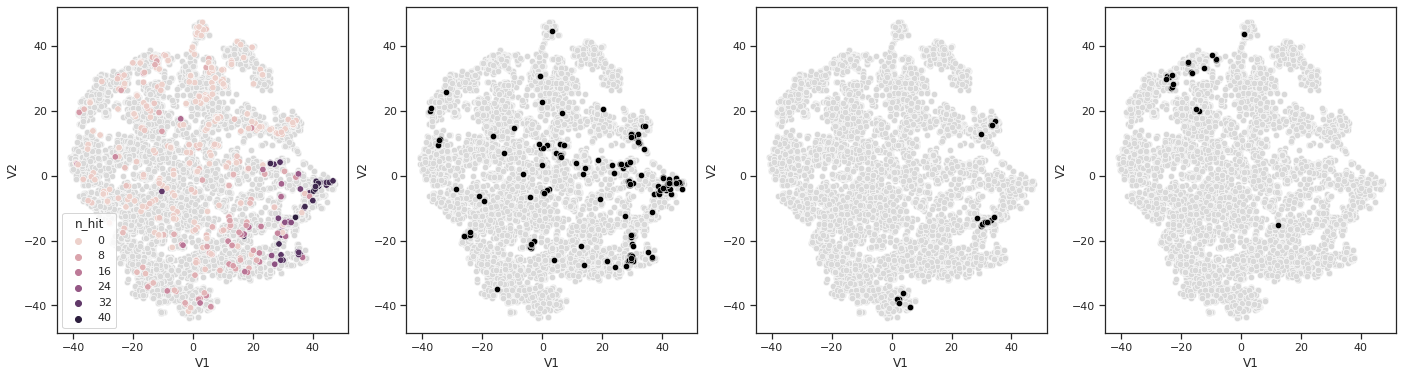

In [38]:
top_fungicidals_anno_df = pd.read_csv('../data/top30_fungicidal_inchikeys_spitzer.csv')
a_muciniphilia_anno_df = pd.read_csv('../data/amuciniphilia_inchikeys_df.csv')

sns.set(rc={"figure.figsize":(24, 6)})
sns.set_theme(style="ticks")

fig, ax =plt.subplots(1,4)
sns.scatterplot(x='V1', y='V2', data=p_data, s=40, color=".85", ax=ax[0])
sns.scatterplot(x='V1', y='V2', data=p_data.dropna(), s=40, hue='n_hit',ax=ax[0])
sns.scatterplot(x='V1', y='V2', data=p_data, s=40, color=".85", ax=ax[1])
sns.scatterplot(x='V1', y='V2', data=p_data[p_data.index.isin(chembl_antibiotics_df['InChiKey'])], s=40, color="0", ax=ax[1])
sns.scatterplot(x='V1', y='V2', data=p_data, s=40, color=".85", ax=ax[2])
sns.scatterplot(x='V1', y='V2', data=p_data[p_data.index.isin(top_fungicidals_anno_df['InChiKey'])], s=40, color="0", ax=ax[2])
sns.scatterplot(x='V1', y='V2', data=p_data, s=40, color=".85", ax=ax[3])
sns.scatterplot(x='V1', y='V2', data=p_data[p_data.index.isin(a_muciniphilia_anno_df['InChiKeys'])], s=40, color="0", ax=ax[3])
fig.show()

In [ ]:
# get sign4 values for all compounds of the original dataset
compound_mapping_df = pd.read_csv('../data/compound_name_smiles_inchi_corrected_inchikeys_df.csv')
train_smiles = compound_mapping_df[compound_mapping_df.InChiKey.isin(X_train.index)]['SMILES_id'].to_list()
test_smiles = compound_mapping_df[compound_mapping_df.InChiKey.isin(X_test.index)]['SMILES_id'].to_list()

train_dest_file = '../data/M1_sign4_train_test_split_manual_triplets_train_data.h5'
test_dest_file = '../data/M1_sign4_train_test_split_manual_triplets_test_data.h5'

sign4.predict_from_smiles(train_smiles, dest_file=train_dest_file)
sign4.predict_from_smiles(test_smiles, dest_file=test_dest_file)

In [48]:
# save as csv file
train_h5 = DataSignature(train_dest_file)
train_df = pd.DataFrame(train_h5.get_h5_dataset('V'))
train_df['SMILES_id'] = train_smiles
train_df = train_df.merge(compound_mapping_df, how='left', on='SMILES_id')
train_df.to_csv('../data/M1_sign4_train_test_split_manual_triplets_train_data.csv')

test_h5 = DataSignature(test_dest_file)
test_df = pd.DataFrame(test_h5.get_h5_dataset('V'))
test_df['SMILES_id'] = test_smiles
test_df = test_df.merge(compound_mapping_df, how='left', on='SMILES_id')
test_df.to_csv('../data/M1_sign4_train_test_split_manual_triplets_test_data.csv')

2022-07-14 16:19:39,293 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching dataset V
2022-07-14 16:19:39,379 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching dataset V
